<a href="https://colab.research.google.com/github/JohnPaul1278/therealps1/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding

In [ ]:
pd.read_html ('https://en.wikipedia.org/wiki/List_of_counties_in_Michigan', match='County', flavor=None)[0].tail(10)
#okay I've got this working at least. This is uh. Not a very helpful way of looking at it though. I'll keep it here so you can see my work at least


,Counties of Michigan,Counties of Michigan.1
0,MR LN HD BN SJ CS BE WY WA JK CA KA VB MB OK L...,MR LN HD BN SJ CS BE WY WA JK CA KA VB MB OK L...
1,Location,Michigan
2,Number,83
3,Populations,"2,180 (Keweenaw) – 1,757,043 (Wayne)"
4,Areas,"508 square miles (1,320 km2) (Cass) – 5,966 sq..."
5,Government,".mw-parser-output .plainlist ol,.mw-parser-out..."
6,Subdivisions,"Cities, charter townships, civil townships, vi..."


In [ ]:
pd.read_html ('https://en.wikipedia.org/wiki/List_of_counties_in_New_Jersey', match='Density', flavor=None)[0].head(3)
#okay so when I copy your code exactly I can make this work. I wonder what is so different about the format of Michigan's list when compared to New Jersey's...

,County,FIPS code[12],County seat[13],Largest City[14],Est.[13],Formed from[6][7],Named for[15],Density (per mi2),Pop.[16],Area[13],Map
0,Atlantic County,1,Mays Landing,"Egg Harbor Township 47,842",1837,Gloucester County,"The Atlantic Ocean, which forms the county's e...",491.33,275638,"561 sq mi (1,453 km2)",NaN
1,Bergen County,3,Hackensack,"Hackensack 46,030",1683,One of four original counties created in East ...,"Bergen, New Netherland settlement",4072.64,952997,234 sq mi (606 km2),NaN
2,Burlington County,5,Mount Holly,"Evesham Township 46,826",1694,One of two original counties created in West J...,The old ancient name for an inland market near...,579.01,466103,"805 sq mi (2,085 km2)",NaN


In [ ]:
pd.read_html ('https://en.wikipedia.org/wiki/List_of_Michigan_locations_by_per_capita_income', match='Rank')[0].head(10)
#Ah ha! Got it! Here we have a top ten list of Michigan Counties based on income per capita!
#This is fascinating. My family lives in Ingham County, which is where Michigan's Capital is, and I don't see it in the top ten.
#The discrepency between Oakland and Leelanau

,Rank,County,Per capita income,Median household income,Median family income,Population,Number of households
0,1.0,Oakland,"$56,138","$85,991","$94,783",1202362,483698
1,2.0,Leelanau,"$32,194","$56,527","$65,342",21708,9255
2,3.0,Livingston,"$31,609","$72,129","$82,637",180967,67380
3,4.0,Washtenaw,"$31,316","$59,065","$82,184",344791,137193
4,5.0,Charlevoix,"$28,403","$48,704","$57,022",25949,10882
5,6.0,Midland,"$28,363","$51,103","$63,299",83629,33437
6,7.0,Emmet,"$28,308","$49,235","$61,600",32694,13601
7,NaN,United States,"$27,334","$51,914","$62,982",308745538,116716292
8,8.0,Clinton,"$27,223","$58,016","$69,611",75382,28766
9,9.0,Grand Traverse,"$27,091","$50,647","$61,780",86986,35328


In [2]:
auto=pd.read_stata('avg_past_claims_by_state.dta') #aok: no, breaks for me; need to download it first!
auto.head(2)
#HAHA I'M MAKING IT WORK
#NOW WE'RE COOKING WITH GAS!

FileNotFoundError: ignored

In [ ]:
auto=pd.read_stata('avg_past_claims_by_state.dta')
auto.head(50)
#okay okay I know it's a big list but I wanted to look at it.

,state,avg_past_initial_claims
0,AK,895.50
1,AL,1698.00
2,AR,1424.50
3,AZ,3359.50
4,CA,44412.00
5,CO,1932.25
6,CT,2811.25
7,DC,639.50
8,DE,536.50
9,FL,5375.50


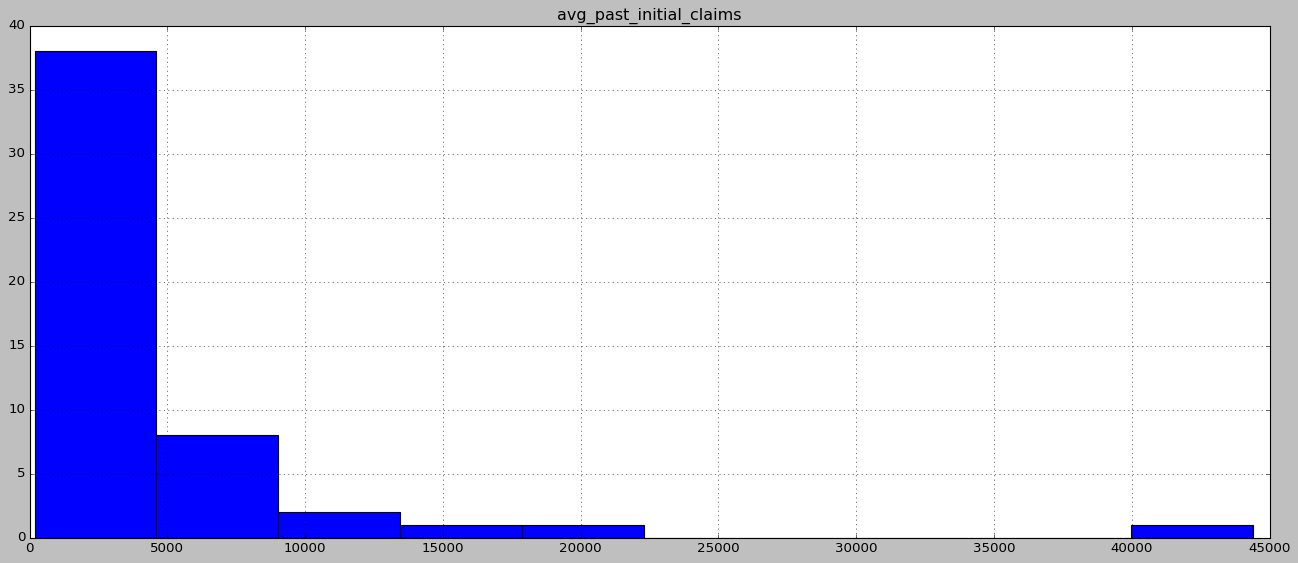

In [ ]:
auto.hist(figsize=(20,8));
#interesting. This dataset is broken up into several files. That is both good and bad.
#This specific file only covers this specific variable

In [ ]:
auto.describe

<bound method NDFrame.describe of    state  avg_past_initial_claims
0     AK                   895.50
1     AL                  1698.00
2     AR                  1424.50
3     AZ                  3359.50
4     CA                 44412.00
5     CO                  1932.25
6     CT                  2811.25
7     DC                   639.50
8     DE                   536.50
9     FL                  5375.50
10    GA                  5145.50
11    HI                  1233.25
12    IA                  2330.25
13    ID                  1020.25
14    IL                 10206.00
15    IN                  2518.50
16    KS                  1532.75
17    KY                  2494.75
18    LA                  1815.00
19    MA                  6572.50
20    MD                  2966.25
21    ME                   737.00
22    MI                  5462.25
23    MN                  3611.75
24    MO                  3201.25
25    MS                   899.25
26    MT                   755.25
27    NC      

In [3]:
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download #aok use your own data
# index is the key or id var.get_group
auto=pd.read_stata('auto.dta') #,index_col='make' load stata data
auto.head(2)
#useful to set index to sth meaningful as opposed to 0,1,2
#auto = auto.set_index('make')

#auto.to_stata('stata.dta') #save as stata data

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


In [ ]:
auto.to_excel('KFF_policy_data.xlsx', sheet_name = 'testing', index = False) #save as xls
excelTest1 = pd.read_excel('KFF_policy_data.xlsx', 0)
excelTest1.head(2)
excelTest1.tail(2)


,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign
73,Volvo 260,11995,17,5.0,2.5,14,3170,193,37,163,2.98,Foreign


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'rep78'}>],
       [<Axes: title={'center': 'headroom'}>,
        <Axes: title={'center': 'trunk'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'turn'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'gear_ratio'}>, <Axes: >, <Axes: >]],
      dtype=object)

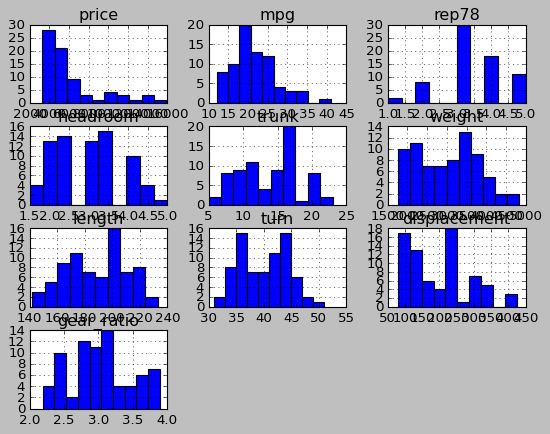

In [ ]:
excelTest1.hist()